No fit TC possible


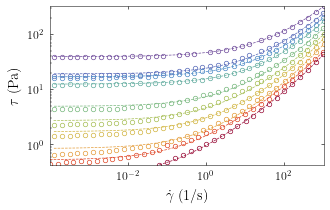

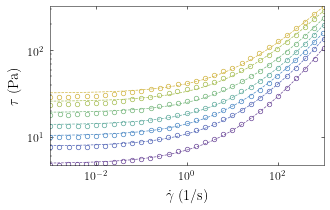

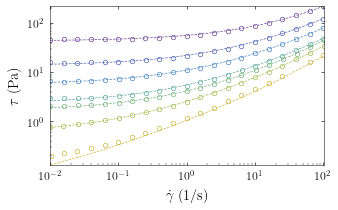

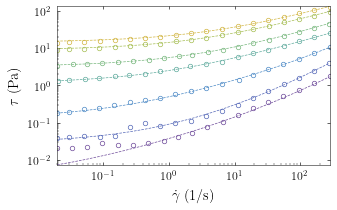

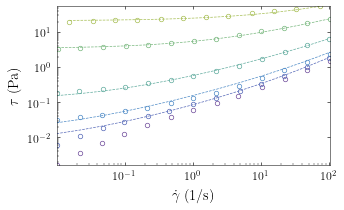

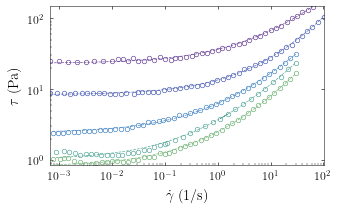

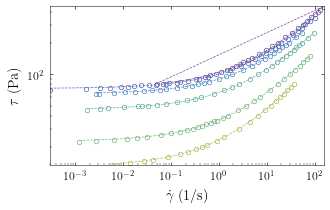

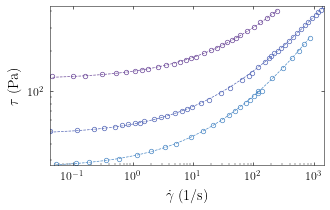

In [2]:
import pandas as pd
import yaml
import numpy as np
from plot_function import *
from scipy.optimize import curve_fit
import glob
from datetime import date
from extract_all_data import *

In [3]:
def TC(x, tauy, gamma_dotc, etas):
    return tauy + tauy*((x / gamma_dotc)**0.5) + etas * x

In [4]:
def df_dilu(df, ID):
    new_df = pd.DataFrame(columns=['ID', 'wp', 'shear_rate', 'stress'])
    
    for wp in df.w_pourcent.unique():
        dfwp = df[df.w_pourcent == wp]
        Stress = np.array([])
        Shear_rate = np.array([])
        for i in dfwp.index :
            dfi = dfwp.loc[i]
            stress = np.array(dfi['stress'], dtype=float)
            shear_rate = np.array(dfi['shear_rate'], dtype=float)
            Shear_rate, Stress = merge_physical_data(Shear_rate,
                                                     shear_rate,
                                                     Stress, stress)
            temp_df = pd.DataFrame({'stress': Stress, 'shear_rate': Shear_rate})
            temp_df = temp_df.sort_values('shear_rate')
        new_df = new_df.append(dict(zip(new_df.columns,
                                    [ID, wp, np.array(temp_df.shear_rate), np.array(temp_df.stress)])),
                                    ignore_index=True)
        
    
    return new_df
        

## Import pkl files

In [5]:
pkl_files = glob.glob('df_*.pkl')
my_data = pd.read_pickle(glob.glob('U:\\My Documents\\Recherche\\Données\\Rheo\\2021_06_07_rheo_cp2\\df.pkl')[0])


In [6]:
Cp_in_pg = my_data[((my_data.prep_date == date(2021, 7, 16)) | (my_data.prep_date == date(2021, 9, 7)) )&
                   (my_data.experiment_type == 'flow_curve') &
                   (my_data.temperature == 20) &
                   (my_data.microgel_type == 'carbopol')]
Cp_in_water = my_data[(my_data.prep_date == date(2021, 8, 25)) &
                      (my_data.experiment_type == 'flow_curve') &
                      (my_data.temperature == 20) & 
                      (my_data.w_pourcent < 2 )]
pnipam_in_pg = my_data[(my_data.microgel_type == 'pnipam') &
                       (my_data.experiment_type == 'flow_curve')] 

Cp_in_pg = df_dilu(Cp_in_pg, 'cp~in~pg')
Cp_in_water = df_dilu(Cp_in_water, 'cp~in~water')
pnipam_in_pg = df_dilu(pnipam_in_pg, 'pnipam_in_pg')

pnipam_in_pg = pnipam_in_pg.sort_values('wp')
Cp_in_pg = Cp_in_pg.sort_values('wp')
Cp_in_water = Cp_in_water.sort_values('wp')

No fit TC possible
No fit TC possible
No fit TC possible
No fit TC possible
No fit TC possible
No fit TC possible
No fit TC possible


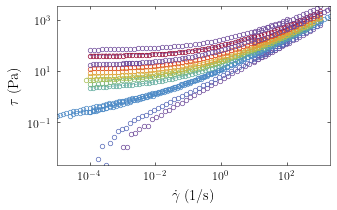

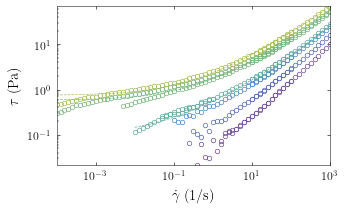

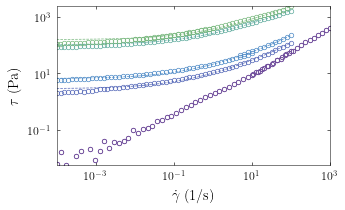

In [7]:
fit_TC(Cp_in_pg)
fit_TC(Cp_in_water)
fit_TC(pnipam_in_pg)

In [8]:
names = []
#names += ['Cp_in_pg', 'Cp_in_water']
for file in pkl_files:
    name = file.split('_')[-1].replace('.pkl', '')
    names += [name]
    globals()[name] = pd.read_pickle(file)

In [9]:
Dekker2018

,ID,solvent_viscosity,phi,shear_rate,stress,tauc_TC,err_taucTC,gamma_dotc,err_gammadotc,etas,err_etas
0,Fig2_Dekker2018,0.00089,0.68,"[0.0009841187553819, 0.001590824416176, 0.0024...","[4.6944715978543, 4.6944715978543, 4.734528691...",4.86,0.07,5.5,0.2,0.0358,0.0008
1,Fig2_Dekker2018,0.00089,0.70,"[0.0009841187553819, 0.0015655601444783, 0.002...","[7.490981859884686, 7.554901080082761, 7.55490...",7.73,0.07,6.9,0.2,0.0344,0.0007
2,Fig2_Dekker2018,0.00089,0.72,"[0.0009841187553819, 0.001590824416176, 0.0024...","[9.915393703344993, 9.915393703344993, 9.91539...",10.20,0.10,7.3,0.3,0.0310,0.0010
3,Fig2_Dekker2018,0.00089,0.74,"[0.0009841187553819, 0.0015655601444783, 0.002...","[13.124452058658024, 13.236440681352317, 13.12...",13.70,0.20,9.2,0.4,0.0390,0.0020
4,Fig2_Dekker2018,0.00089,0.76,"[0.0009841187553819, 0.0016164963907822, 0.002...","[17.820607675742046, 18.12602534956567, 17.972...",19.00,0.20,10.5,0.5,0.0300,0.0030
5,Fig2_Dekker2018,0.00089,0.78,"[0.0009841187553819, 0.001590824416176, 0.0024...","[23.38857110964297, 23.588141640561147, 23.789...",25.50,0.40,10.4,0.6,0.0100,0.0050
6,Fig2_Dekker2018,0.00089,0.80,"[0.001, 0.001590824416176, 0.0024905313028281,...","[28.679037751284174, 28.436395033707623, 28.92...",31.90,0.70,12.1,1.0,0.0000,0.0080


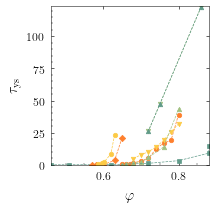

In [15]:
fig, ax, color, marker = create_plot(colors=['#fe7f2d', '#fcca46', '#a1c181', '#619b8a'], two_sided=True)

for name in names:
    dfh = (globals()[name])
    tauc = dfh.tauc_TC
    err_tauc = dfh.err_taucTC
    l = np.array(dfh.ID)[0]
    tauc_max = tauc.max()
    c = next(color)
    m = next(marker)
    try:
        phi = dfh.phi
    
        ax.errorbar(phi, tauc, yerr=err_tauc, label=r'$\mathrm{' + l + '}$', ls='--', c=c, mfc=c, marker=m)
    except AttributeError:
        cp = dfh.cp
        ax.plot(cp, tauc, label=r'$\mathrm{' + l + '}$', ls='-')
#ax.legend(bbox_to_anchor=(1,1))
ax.set(#ylim=(0, 35), xlim=(0.4, 1), 
      xlabel=r'$\varphi$', ylabel=r'$\tau_\mathrm{ys}$');
fig.savefig('1.pdf', bbox_inches='tight')

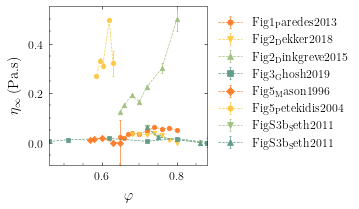

In [16]:
fig, ax, color, marker = create_plot(colors=['#fe7f2d', '#fcca46', '#a1c181', '#619b8a'], two_sided=True)

for name in names:
    dfh = (globals()[name])
    tauc = dfh.tauc_TC
    etas = dfh.etas
    l = np.array(dfh.ID)[0]
    tau_max = tauc.max()
    c = next(color)
    m = next(marker)
    err_etas = dfh.err_etas
    try:
        phi = dfh.phi
    
        ax.errorbar(phi, etas, yerr=err_etas, label=r'$\mathrm{' + l + '}$', ls='--', c=c, mfc=c, marker=m)
    except AttributeError:
        cp = dfh.cp
        ax.plot(cp, tauc, label=r'$\mathrm{' + l + '}$', ls='-')
ax.legend(bbox_to_anchor=(1,1))
ax.set(#ylim=(-0.1, 0.5), xlim=(0.4, 1), 
      xlabel=r'$\varphi$', ylabel=r'$\eta_\infty~\mathrm{(Pa.s)}$');
fig.savefig('2.pdf', bbox_inches='tight')

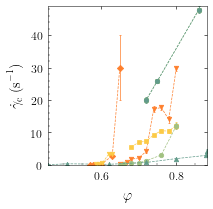

In [17]:
fig, ax, color, marker = create_plot(colors=['#fe7f2d', '#fcca46', '#a1c181', '#619b8a'], two_sided=True)

for name in names:
    dfh = (globals()[name])
    tauc = dfh.tauc_TC
    etas = dfh.etas
    gammadotc = dfh.gamma_dotc
    err_gammadotc = dfh.err_gammadotc
    l = np.array(dfh.ID)[0]
    tau_max = tauc.max()
    c = next(color)
    m = next(marker)
    err_etas = dfh.err_etas
    try:
        phi = dfh.phi
    
        ax.errorbar(phi, gammadotc, yerr=err_gammadotc, label=r'$\mathrm{' + l + '}$', ls='--', c=c, mfc=c, marker=next(marker))
    except AttributeError:
        cp = dfh.cp
        ax.plot(cp, tauc, label=r'$\mathrm{' + l + '}$', ls='-')
#ax.legend(bbox_to_anchor=(1,1))
ax.set(#ylim=(0, 40), xlim=(0.4, 1),
       #yscale='log',
      xlabel=r'$\varphi$', ylabel=r'$\dot{\gamma}_\mathrm{c}~\mathrm{(s}^{-1}\mathrm{)}$');
fig.savefig('3.pdf', bbox_inches='tight')

Remarque : la différence entre les manips ne vient pas de la viscosité du solvent

Paredes2013
Dekker2018
Dinkgreve2015
Ghosh2019
Mason1996
Petekidis2004
Seth2011
Seth2011


[Text(0.5, 0, '$\\varphi~\\mathrm{(1/s)}$'),
 Text(0, 0.5, '$\\dot{\\gamma}_\\mathrm{c}~\\mathrm{(1/s)}$')]

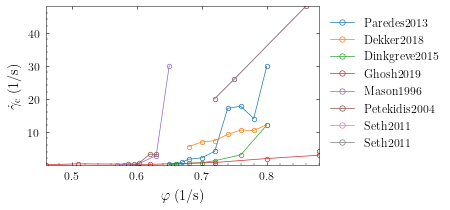

In [18]:
fig, ax, color, marker = create_plot()
for name in names:
    print(name)
    dfh = (globals()[name])
    phi = dfh.phi
    gammadotc = dfh.gamma_dotc
    ax.plot(phi, gammadotc, label=r'$\mathrm{' + name + '}$', ls='-')
    
ax.legend(bbox_to_anchor=(1,1))
ax.set(#yscale='log',
       #ylim=(-0.1, 0.5), xlim=(0.4, 1), 
       xlabel=r'$\varphi~\mathrm{(1/s)}$', ylabel=r'$\dot{\gamma}_\mathrm{c}~\mathrm{(1/s)}$')

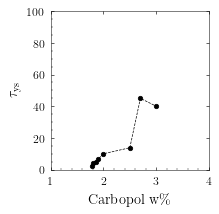

In [20]:
fig, ax, color, marker = create_plot(two_sided=True)

tauc = Cp_in_pg.tauc_TC
cp = Cp_in_pg.wp
ax.plot(cp, tauc, ls='--', c='k', mfc='k')
ax.set(xlim=(1,4), ylim=(0, 100), 
      xlabel=r'$\mathrm{Carbopol~w}\%$', ylabel=r'$\tau_\mathrm{ys}$')
fig.savefig('4.pdf')

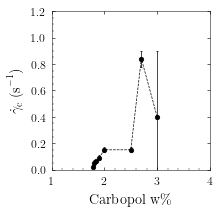

In [21]:
fig, ax, color, marker = create_plot(two_sided=True)

gammadotc = Cp_in_pg.gamma_dotc
err_gammadotc = Cp_in_pg.err_gammadotc
cp = Cp_in_pg.wp
ax.errorbar(cp, gammadotc, yerr=err_gammadotc,  ls='--', c='k', mfc='k')
ax.set(xlim=(1,4), ylim=(0, 1.2), 
      xlabel=r'$\mathrm{Carbopol~w}\%$', ylabel=r'$\dot{\gamma}_\mathrm{c}~\mathrm{(s}^{-1}\mathrm{)}$')
fig.savefig('5.pdf')

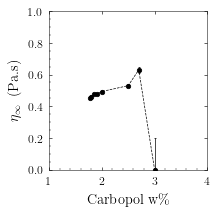

In [22]:
fig, ax, color, marker = create_plot(two_sided=True)

etas = Cp_in_pg.etas
err_etas = Cp_in_pg.err_etas
cp = Cp_in_pg.wp
ax.errorbar(cp, etas, yerr=err_etas,  ls='--', c='k', mfc='k')
ax.set(xlim=(1,4), ylim=(0, 1), 
      xlabel=r'$\mathrm{Carbopol~w}\%$', ylabel=r'$\eta_\infty~~\mathrm{(Pa.s)}$')
fig.savefig('6.pdf')

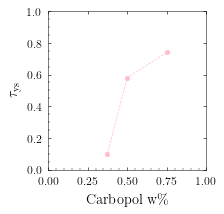

In [23]:
fig, ax, color, marker = create_plot(two_sided=True)

tauc = Cp_in_water.tauc_TC
cp = Cp_in_water.wp
ax.plot(cp, tauc, ls='--', c='pink', mfc='pink')
ax.set(xlim=(0,1), ylim=(0, 1), 
      xlabel=r'$\mathrm{Carbopol~w}\%$', ylabel=r'$\tau_\mathrm{ys}$')
fig.savefig('7.pdf')

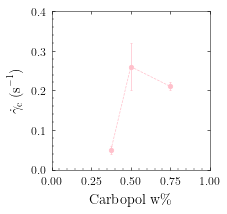

In [24]:
fig, ax, color, marker = create_plot(two_sided=True)

gammadotc = Cp_in_water.gamma_dotc
err_gammadotc = Cp_in_water.err_gammadotc
cp = Cp_in_water.wp
ax.errorbar(cp, gammadotc, yerr=err_gammadotc,  ls='--', c='pink', mfc='pink')
ax.set(xlim=(0,1), ylim=(0, 0.4), 
      xlabel=r'$\mathrm{Carbopol~w}\%$', ylabel=r'$\dot{\gamma}_\mathrm{c}~\mathrm{(s}^{-1}\mathrm{)}$')
fig.savefig('8.pdf')

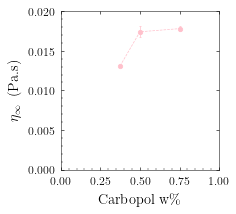

In [25]:
fig, ax, color, marker = create_plot(two_sided=True)

etas = Cp_in_water.etas
err_etas = Cp_in_water.err_etas
cp = Cp_in_water.wp
ax.errorbar(cp, etas, yerr=err_etas,  ls='--', c='pink', mfc='pink')
ax.set(xlim=(0,1), ylim=(0, 0.02), 
      xlabel=r'$\mathrm{Carbopol~w}\%$', ylabel=r'$\eta_\infty~~\mathrm{(Pa.s)}$')
fig.savefig('9.pdf')